In [1]:
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
import time
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
sns.set(font_scale=1.6)

In [3]:
# Random seeds for reproducibility
np.random.seed(123)
start_time = time.time()

In [4]:
def statefunction (N,stateI,tI,t_max):
    ##define transition rate prameters
    Lambda2_1_1 = 7; Mu1_2_1 = 100 #element-1
    Lambda2_1_2 = 10; Mu1_2_2 = 80 #element-2
    Lambda3_2_3 = 10; Lambda2_1_3 = 7; Mu1_2_3 = 120; Mu2_3_3 = 110 #element-3
        
    #define departure rate
    a01 = Lambda2_1_1+Lambda2_1_2+Lambda3_2_3
    a02 = Mu1_2_1+Lambda2_1_2+Lambda3_2_3
    a03 = Mu1_2_2+Lambda2_1_1+Lambda3_2_3
    a04 = Mu2_3_3+Lambda2_1_1+Lambda2_1_2+Lambda2_1_3
    a05 = Mu1_2_2+Mu1_2_1+Lambda3_2_3
    a06 = Mu2_3_3+Mu1_2_1+Lambda2_1_2+Lambda2_1_3
    a07 = Mu2_3_3+Mu1_2_2+Lambda2_1_1+Lambda2_1_3 
    a08 = Mu1_2_3+Lambda2_1_1+Lambda2_1_2
    a09 = Mu2_3_3+Mu1_2_2+Mu1_2_1+Lambda2_1_3
    a10 = Mu1_2_3+Mu1_2_1+Lambda2_1_2
    a11 = Mu1_2_3+Mu1_2_2+Lambda2_1_1
    a12 = Mu1_2_3+Mu1_2_2+Mu1_2_1
        
    ####given state0
    if stateI == 1:        
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a01
        
    ####given state2
    if stateI == 2:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a02
    
    ####given state3
    if stateI == 3:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a03
        
    ####given state4
    if stateI == 4:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a04
        
    ####given state5
    if stateI == 5:        
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a05
        
    ####given state6
    if stateI == 6:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a06
    
    ####given state7
    if stateI == 7:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a07
        
    ####given state8
    if stateI == 8:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a08
    
    ####given state9
    if stateI == 9:        
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a09
        
    ####given state10
    if stateI == 10:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a10
    
    ####given state11
    if stateI == 11:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a11
        
    ####given state12
    if stateI == 12:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = tI-np.log(1-U)/a12
    
    return float(tO) #output departure time

#### Function to define the state transition 

In [5]:
def tranfunction(stateI, tO):
    stateI = int(stateI)
    tO=float(tO)
    
    ##define transition rate prameters
    Lambda2_1_1 = 7; Mu1_2_1 = 100 #element-1
    Lambda2_1_2 = 10; Mu1_2_2 = 80 #element-2
    Lambda3_2_3 = 10; Lambda2_1_3 = 7; Mu1_2_3 = 120; Mu2_3_3 = 110 #element-3
        
    #define departure rate
    a01 = Lambda2_1_1+Lambda2_1_2+Lambda3_2_3
    a02 = Mu1_2_1+Lambda2_1_2+Lambda3_2_3
    a03 = Mu1_2_2+Lambda2_1_1+Lambda3_2_3
    a04 = Mu2_3_3+Lambda2_1_1+Lambda2_1_2+Lambda2_1_3
    a05 = Mu1_2_2+Mu1_2_1+Lambda3_2_3
    a06 = Mu2_3_3+Mu1_2_1+Lambda2_1_2+Lambda2_1_3
    a07 = Mu2_3_3+Mu1_2_2+Lambda2_1_1+Lambda2_1_3 
    a08 = Mu1_2_3+Lambda2_1_1+Lambda2_1_2
    a09 = Mu2_3_3+Mu1_2_2+Mu1_2_1+Lambda2_1_3
    a10 = Mu1_2_3+Mu1_2_1+Lambda2_1_2
    a11 = Mu1_2_3+Mu1_2_2+Lambda2_1_1
    a12 = Mu1_2_3+Mu1_2_2+Mu1_2_1

    #following departure
    #calculate transition probability
    ####given state1
    if stateI == 1:
        #probability
        tranP = [Lambda2_1_1/a01,Lambda2_1_2/a01,Lambda3_2_3/a01]
        tranS = [2,3,4]
        tranResult = np.matrix([tranS,tranP]).transpose()
       
    ####given state2
    if stateI == 2:
        #probability
        tranP = [Mu1_2_1/a02,Lambda2_1_2/a02,Lambda3_2_3/a02]
        tranS = [1,5,6]
        tranResult = np.matrix([tranS,tranP]).transpose()

    ####given state3
    if stateI == 3:
        #probability
        tranP = [Mu1_2_2/a03,Lambda2_1_1/a03,Lambda3_2_3/a03]
        tranS = [1,5,7]
        tranResult = np.matrix([tranS,tranP]).transpose()    
    
    ####given state4
    if stateI == 4:
        #probability
        tranP = [Mu2_3_3/a04,Lambda2_1_1/a04,Lambda2_1_2/a04,Lambda2_1_3/a04]
        tranS = [1,6,7,8]
        tranResult = np.matrix([tranS,tranP]).transpose()
    
    ####given state5
    if stateI == 5:
        #probability
        tranP = [Mu1_2_2/a05,Mu1_2_1/a05,Lambda3_2_3/a05]
        tranS = [2,3,9]
        tranResult = np.matrix([tranS,tranP]).transpose()
    
    ####given state6
    if stateI == 6:
        #probability
        tranP = [Mu2_3_3/a06,Mu1_2_1/a06,Lambda2_1_2/a06,Lambda2_1_3/a06]
        tranS = [2,4,9,10]
        tranResult = np.matrix([tranS,tranP]).transpose()
    ####given state7
    if stateI == 7:
        #probability
        
        tranP = [Mu2_3_3/a07,Mu1_2_2/a07,Lambda2_1_1/a07,Lambda2_1_3/a07]
        tranS = [3,4,9,11]
        tranResult = np.matrix([tranS,tranP]).transpose()        
        
    ####given state8
    if stateI == 8:
        #probability
        tranP = [Mu1_2_3/a08,Lambda2_1_1/a08,Lambda2_1_2/a08]
        tranS = [4,10,11]
        tranResult = np.matrix([tranS,tranP]).transpose()        
        
    ####given state9
    if stateI == 9:
        #probability
        tranP = [Mu2_3_3/a09,Mu1_2_2/a09,Mu1_2_1/a09,Lambda2_1_3/a09]
        tranS = [5,6,7,12]
        tranResult = np.matrix([tranS,tranP]).transpose()        
        
    ####given state10
    if stateI == 10:
        #probability
        tranP = [Mu1_2_3/a10,Mu1_2_1/a10,Lambda2_1_2/a10]
        tranS = [6,8,12]
        tranResult = np.matrix([tranS,tranP]).transpose()

    ####given state11
    if stateI == 11:
        #probability
        tranP = [Mu1_2_3/a11,Mu1_2_2/a11,Lambda2_1_1/a11]
        tranS = [7,8,12]
        tranResult = np.matrix([tranS,tranP]).transpose()

    ####given state12
    if stateI == 12:
        #probability
        tranP = [Mu1_2_3/a12,Mu1_2_2/a12,Mu1_2_1/a12]
        tranS = [9,10,11]
        tranResult = np.matrix([tranS,tranP]).transpose()
        
    ####generate a random number from uniform [0,1]
    u = np.random.uniform(0,1,1)
    #sum the transition probability
    sumTransP = np.cumsum(tranResult[:,1])
    #determine the index of state out
    idx = np.sum((u>=sumTransP)+ 0)+1 #+0 convert boolean to numeric
    
    #result
    stateOut = tranResult[idx-1,0]
    final_ret = [stateOut]
    
    return final_ret

#### Run Monte Carlo Simulations

In [6]:
#number of replications
N_max = int(1e6)
#time horizon
t_max = 0.2

## Initialize storage
all_list = np.empty((0,2), int)

## Initialize no. of replication
n_rep = 1

sample_trace = []
for n_rep in tqdm(range(1, N_max+1)):
  
    #initialize time
    t_in_A = [0.]
    #initialize state
    state_in_A = [1]
  
    while (t_in_A[-1] < t_max):
        t_in = t_in_A[-1]
        state_in = state_in_A[-1]
        t_out = statefunction(1,state_in,t_in,t_max)
        
        state_out = tranfunction(state_in,t_out)
        #update
        t_in_A = np.append(t_in_A, t_out)
        state_in_A = np.append(state_in_A, state_out[0])

        out_list = np.column_stack((t_in_A,state_in_A))
    
        sample_trace.append([n_rep, state_in, t_in, t_out])

100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [12:01<00:00, 1386.91it/s]


#### Data analytics to derive state probability

In [7]:
df = pd.DataFrame(sample_trace, columns=['sample_id', 'state', 't_in', 't_out'])

In [8]:
df.head()

,sample_id,state,t_in,t_out
0,1,1.0,0.000000,0.044158
1,1,3.0,0.044158,0.046811
2,1,1.0,0.046811,0.093887
3,1,3.0,0.093887,0.134619
4,1,1.0,0.134619,0.158905


In [9]:
time_idx = np.arange(0.0004, t_max+0.0001, 0.0004)
time_idx

array([0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028, 0.0032,
       0.0036, 0.004 , 0.0044, 0.0048, 0.0052, 0.0056, 0.006 , 0.0064,
       0.0068, 0.0072, 0.0076, 0.008 , 0.0084, 0.0088, 0.0092, 0.0096,
       0.01  , 0.0104, 0.0108, 0.0112, 0.0116, 0.012 , 0.0124, 0.0128,
       0.0132, 0.0136, 0.014 , 0.0144, 0.0148, 0.0152, 0.0156, 0.016 ,
       0.0164, 0.0168, 0.0172, 0.0176, 0.018 , 0.0184, 0.0188, 0.0192,
       0.0196, 0.02  , 0.0204, 0.0208, 0.0212, 0.0216, 0.022 , 0.0224,
       0.0228, 0.0232, 0.0236, 0.024 , 0.0244, 0.0248, 0.0252, 0.0256,
       0.026 , 0.0264, 0.0268, 0.0272, 0.0276, 0.028 , 0.0284, 0.0288,
       0.0292, 0.0296, 0.03  , 0.0304, 0.0308, 0.0312, 0.0316, 0.032 ,
       0.0324, 0.0328, 0.0332, 0.0336, 0.034 , 0.0344, 0.0348, 0.0352,
       0.0356, 0.036 , 0.0364, 0.0368, 0.0372, 0.0376, 0.038 , 0.0384,
       0.0388, 0.0392, 0.0396, 0.04  , 0.0404, 0.0408, 0.0412, 0.0416,
       0.042 , 0.0424, 0.0428, 0.0432, 0.0436, 0.044 , 0.0444, 0.0448,
      

In [10]:
state_probs = []

for i in tqdm(range(len(time_idx))):
    t = time_idx[i]
    
    groups = df[(df['t_in'] <= t) & (df['t_out'] > t)].groupby('state')['sample_id'].groups.keys()
    res = df[(df['t_in'] <= t) & (df['t_out'] > t)].groupby('state')['sample_id'].count().values
    
    j = 0
    states = np.zeros(12)
    for key in groups:
        states[int(key) - 1] = res[j]/N_max
        j += 1

    state_probs.append(list(states))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:29<00:00,  5.59it/s]


In [11]:
state_probs = np.array(state_probs)

df_res = pd.DataFrame()
df_res['time'] = time_idx
df_res['state_1'] = state_probs[:, 0]
df_res['state_2'] = state_probs[:, 1]
df_res['state_3'] = state_probs[:, 2]
df_res['state_4'] = state_probs[:, 3]
df_res['state_5'] = state_probs[:, 4]
df_res['state_6'] = state_probs[:, 5]
df_res['state_7'] = state_probs[:, 6]
df_res['state_8'] = state_probs[:, 7]
df_res['state_9'] = state_probs[:, 8]
df_res['state_10'] = state_probs[:, 9]
df_res['state_11'] = state_probs[:, 10]
df_res['state_12'] = state_probs[:, 11]

In [12]:
df_res.head()

,time,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12
0,0.0004,0.989516,0.002723,0.003868,0.003873,0.000000,0.000004,0.000012,0.000004,0.000000,0.0,0.000000,0.0
1,0.0008,0.979488,0.005280,0.007641,0.007525,0.000000,0.000024,0.000026,0.000016,0.000000,0.0,0.000000,0.0
2,0.0012,0.970056,0.007718,0.011109,0.010950,0.000000,0.000059,0.000064,0.000044,0.000000,0.0,0.000000,0.0
3,0.0016,0.961036,0.010000,0.014438,0.014244,0.000001,0.000094,0.000111,0.000075,0.000001,0.0,0.000000,0.0
4,0.0020,0.952452,0.012248,0.017673,0.017213,0.000001,0.000123,0.000171,0.000118,0.000000,0.0,0.000001,0.0


In [13]:
df_res.to_csv("MCS_homo_example2.4.csv", index = False)

In [14]:
#####################################################################
## used time
#####################################################################
end_time = time.time() 
used_time = end_time - start_time
print("--- %s seconds ---" % (used_time))

--- 814.9815301895142 seconds ---


In [15]:
RE_35 = state_probs[:,0]
RE_20 = state_probs[:,1]
RE_18 = state_probs[:,3] + state_probs[:,5] 
RE_15 = state_probs[:,2] + state_probs[:,6]
RE_00 = state_probs[:,4] + state_probs[:,7] + state_probs[:,8] + state_probs[:,9] + \
        state_probs[:,10] + state_probs[:,11]

#### Visualization

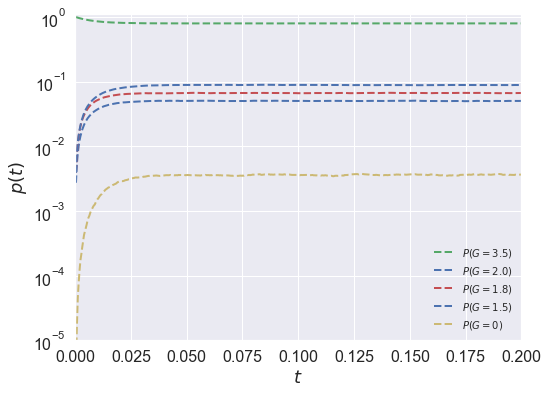

In [16]:
plt.figure(figsize=(8,6))
plt.plot(time_idx, RE_35, 'g--', linewidth = 2, label = "$P(G=3.5)$")
plt.plot(time_idx, RE_20, 'b--', linewidth = 2, label = "$P(G=2.0)$")
plt.plot(time_idx, RE_18, 'r--', linewidth = 2, label = "$P(G=1.8)$")
plt.plot(time_idx, RE_15, '--', linewidth = 2, label = "$P(G=1.5)$")
plt.plot(time_idx, RE_00, 'y--', linewidth = 2, label = "$P(G=0)$")

plt.legend(frameon=False,fontsize=10)
plt.xlabel('$t$', fontsize=18)
plt.ylabel('$p(t)$', fontsize=18)
plt.xlim([0,0.2])
plt.ylim([1e-5,1.1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.show()

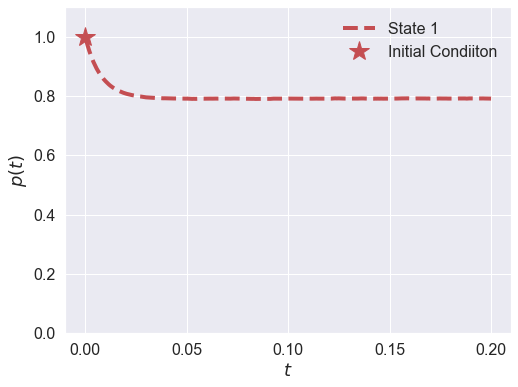

In [17]:
plt.figure(figsize=(8,6))
plt.plot(time_idx, state_probs[:,0], 'r--', linewidth = 4, label = "State 1")
# plt.plot(time_idx, p_final[:,1:2], 'b--', linewidth = 4, label = "State 2")
# plt.plot(time_idx, p_final[:,2:3], 'c--', linewidth = 4, label = "State 3", markersize=20)
# plt.plot(time_idx, p_final[:,3:4], 'r--', linewidth = 4, label = "State 4")
# plt.plot(time_idx, p_final[:,4:5], 'b--', linewidth = 4, label = "State 5")
# plt.plot(time_idx, p_final[:,5:6], 'c--', linewidth = 4, label = "State 6", markersize=20)
# plt.plot(time_idx, p_final[:,6:7], 'r--', linewidth = 4, label = "State 7")
# plt.plot(time_idx, p_final[:,7:8], 'b--', linewidth = 4, label = "State 8")
# plt.plot(time_idx, p_final[:,8:9], 'c--', linewidth = 4, label = "State 9", markersize=20)
# plt.plot(time_idx, p_final[:,9:10], 'r--', linewidth = 4, label = "State 10")
# plt.plot(time_idx, p_final[:,10:11], 'b--', linewidth = 4, label = "State 11")
# plt.plot(time_idx, p_final[:,11:12], 'c--', linewidth = 4, label = "State 12", markersize=20)
plt.plot(0, 1, 'r*', linewidth = 4, label = "Initial Condiiton", markersize=20)
plt.legend(frameon=False,fontsize=16)
plt.xlabel('$t$', fontsize=18)
plt.ylabel('$p(t)$', fontsize=18)
# plt.xlim([-1,30])
plt.ylim([0,1.1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()